<a href="https://colab.research.google.com/github/AuraFrizzati/GoogleCloud-Terraform-EDX-course/blob/main/02_Terraform_Terms_and_Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[02] Terraform Terms & Concepts**

In this module, we introduce you to **HashiCorp Language** and discuss the terms and concepts involved in **authoring a Terraform configuration**.

We also explore some of the important **Terraform commands** involved in managing the terraform configuration.

Upon completion of this module, you will be able to interpret what each code block means, create basic configuration files within Terraform and be able to explain the purpose of a few important Terraform commands and we will also explore what a **Validator tool** is.

Upon completing this module you will be able to

- Explain the **Terraform workflow**.
- Create **basic configuration files** within Terraform.
- Explain the purpose of a few **Terraform commands**.
- Describe the **Terraform Validator tool**.
- **Create, update, and destroy Google Cloud resources** using Terraform.

## **2.1: Terraform configurations and the HashiCorp Language (HCL)**

We will focus on the core steps of the Terraform workflow: Author, Initialise, Plan and Apply

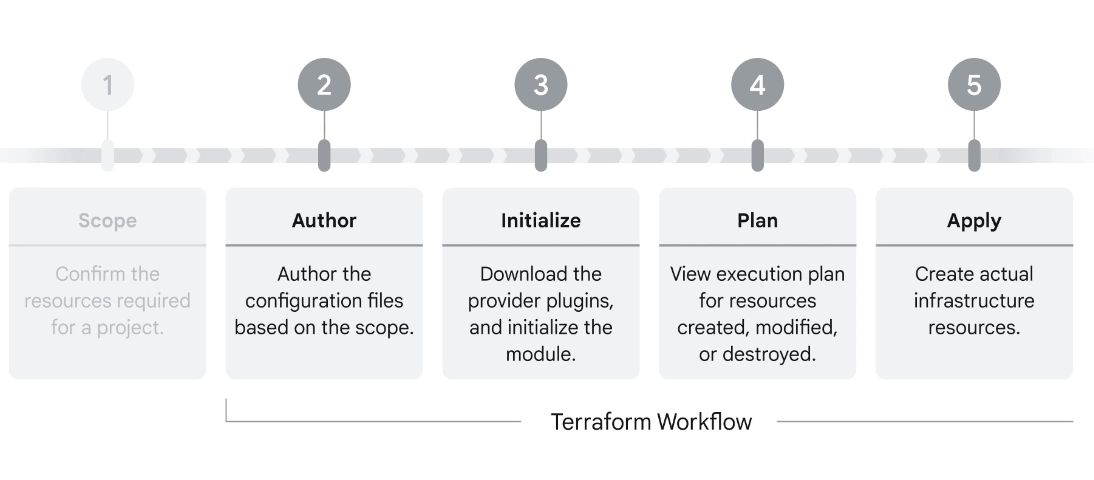

 **Terraform Directory**

 - Before writing HCL code, start by creating **directories** for a Terraform configuration. A Terrafrom directory can consist of. multiple files and directories

 - Terraform uses **configuration files** to **declare an infrastructure element**

 - The configuration is written in **Terraform language** with a `.tf` **extension**

```
-- main.tf
  -- servers/
    -- main.tf
    -- providers.tf
    -- variables.tf
    -- outputs.tf
    -- terraform.tfvars
```

A **configuration** consists of:
- The upper ``-- main.tf`` file is the **root module** (or **root configuration file**)
- There is an **optional directory tree** for the remaining **child modules**
- The **root module** identifies the **working directory** where Terraform commands are run. In the working directory, Terraform will look for any `.tf` file and use them to create an **infrastructure plan**


**HashiCorp Configuration Language (HCL)**

Syntax:

```
<BLOCK TYPE> "<BLOCK LABEL>" "<BLOCK LABEL>" {
  # Block body
  <IDENTIFIER> = <EXPRESSION> #Argument

}
```

- HCL is **Terraform's configuration language** for **creating/managing API-based resources** predominantly in the cloud (i.e. infrastructure objects such as VMs, networks, firewalls, containers, buckets)

- HCL is a **configuration language** (not a programming language!). It is a **JSON-based variant** that is human and machine-friendly   

- It includes a series of **primitives**, such as **variables**, **resources**, **outputs** and **modules**

- It **doesn't contain any traditional statements or control loops**. The **logic** is expressed through **assignments**, **counts** and **interpolation functions**

Example:

```
resource "google_compute_network" "default" {
# A custom mode VPC network resource
name = "mynetwork"
auto_create_subnetworks = false
}
```

**HCL Syntax**

- **Blocks**: lines of code that belong to a **certain type**, e.g. **resources**, **variables** and **outputs**. A block can be simple or nested (to include another block type)

- **Arguments**: they are part of a block and used to **allocate a value to a name**. Some blocks have mandatory arguments, while others are optional

- **Identifiers**: **names** of an **argument**, **block type** or any **Terraform specific construct**. They can include letters, underscores, hyphens and digits, but cannot start with a digit.

- **Expressions**: they can be used to **assign a value to an identifier** within a code block. These expressions can be simple or complex

- **Comments**: they start with an hash `#` for a single line comment

The **order** of the **blocks** or **files doesn't matter**, given the declarative nature of HCL

## **2.2: Author Phase Terms & Concepts**

**Resources**

- They are **code blocks** that **define the infrastructure components** (e.g. Cloud Storage Buckets)

- Terraform uses the `resource type` (it **depends on the provider** defined in your configuration and cannot be customised) and `resource name` (of your choice) to **identify an infrastructure element**

```
-- main.tf
```

```
resource "resource_type" "resource_name" {
# Resource specific arguments
}
```

Example:
```
resource "google_storage_bucket" "example-bucket" {
  name     = "<unique-bucket-name>"
  location = "US"
}

resource "google_compute_instance" "my_instance" {
  name         = "test"
  machine_type = "e2-medium"
  zone         = "us-central1-a"
  boot_disk {
    initialize_params{
      image = "debian-cloud/debian9"
    }
  }
  network_interface {
    network = "default"
  }

}
```

- You can use **separate files** for each type of resource (e.g. separate .tf files for instances, storage buckets etc) if you have lengthy resource configuration

**Providers**

```
-- providers.tf
```

- Terraform **downloads the provider plugin** in the **root configuration** when the provider is declared

- Providers expose **specific APIs** as **Terraform resources** and manages their interactions

```
terraform {
  required_providers {
    google = {
      source  = "hashicorp/google"
      version = "4.23.0"
    }
  }
}

provider "google" {
  # Configuration options
  project = <project_id>
  region  = "us-central1"
}
```

- When a provider block is not included in a Terraform configuration, Terraform assumes an empty configuration

- If a **provider version** is not specified, Terraform will download the most recent provider version during initialisation

**Variables**

```
-- variables.tf
```

- **Parameterise resource arguments** to eliminate hard coding its values (e.g. region, project ID, zone, etc)

- Define a **resource attribute** at **run time** or **centrally** in a file with a `.tfvars` extension

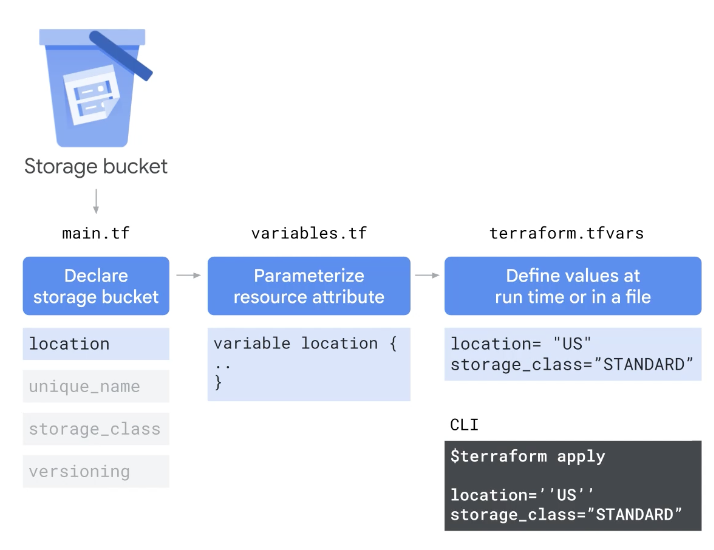

**Outputs**

```
outputs.tf
```

- Output values **expose values of resource** attributes that can be used elsewhere in the configuration

- Some resource outputs are computed upon their creation, for example a self link to the bucket is generated upon bucket creation. This attribute might be required to access the bucket and uploading objects. With an output variable, you can store this information and make it accessible   

```
output "bucket_URL" {
  value = google_storage_bucket.mybucket.URL
}
```

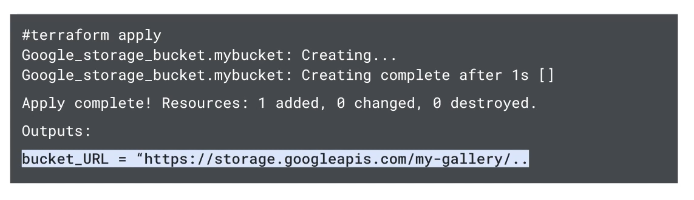

**State**

```
-- terraform.tfstate
```

- Terraform saves the **state of resources** it manages in a state file
- The **state file** can be **stored**:
  - **locally** (default)
  - **remotely** in a shared location (preferred method when working in a team environment)
- You **do not modify this file**, as it is created/updated automatically



```
{
  "version": 4,
  "terraform_version": "1.0.11",
  "serial": 3,
  lineage: "822c3d96-0500-29cd-68e3",
  "outputs": {
    "vm_name":{
      "value": "terraform-test",
      "type": "string"
    }
  },

  "resources":{
    {
      "mode": "managed",
      "type": "google_compute_instance",
      "name": "default",
      "provider": "provider[\"registry.terraform.io/hashicorp/google\"]",
    
    instances:[]

    
    }
  }

}
```

**Modules**

A Terraform module is a **set of Terraform configuration files in a single directory**.
- It is the **primary method for code reuse** in Terraform
- There are 2 kinds of sources:
  - **Local**: souce within your directory
  - **Remote**: source outside your directory

```
-- instances/
  --main.tf
  --variables.tf
  --outputs.tf
```

## **2.3: Terraform Commands**

Once Terraform is installed in your machine, you can use commands in your root module to interact with Terraform


Common commands are:

- `terraform init`: **initialise the provider** with the **plugin**
- `terraform plan`: **preview the resources** that will be created after `terraform apply`
- `terraform apply`: **create** real infrastructure **resources**
- `terraform destroy`: **destroy** infrastructure **resources**
- `terraform fmt`: **auto-format** to **match canonical conventions**


**Initialise Terraform using `terraform init`**

`terraform init` is run during the **initialise phase**, as the first command to be run after creating a new configuration or having checked out an existing configuration from the version control.


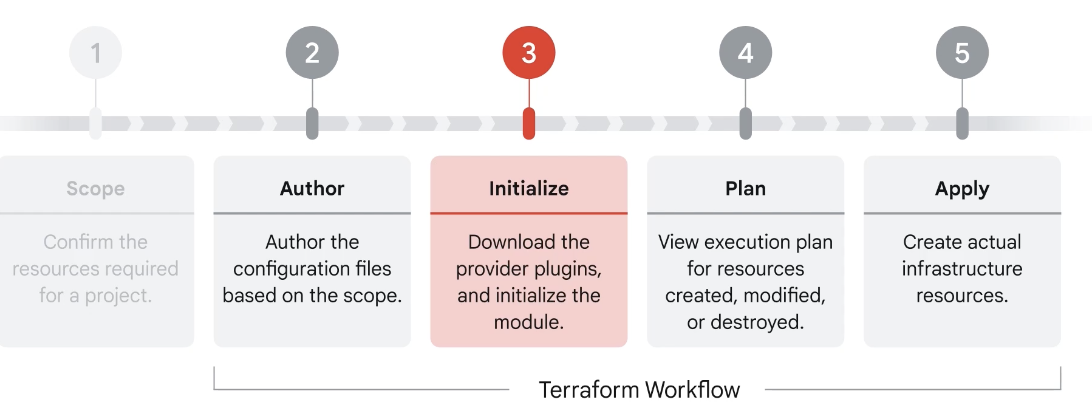

- `terraform init` **downloads the provider plugin**: It ensures that the Google plugin provider is downloaded and installed in a sub-directory of the current working directory, along with the various other book-keeping files

- The **provider block** includes a **source attribute**, specifying **where the provider plugins will be downloaded from**. Terraform uses a **plugin-based architecture** to support the numerous infrastructure and service providers available. Each provider has its own incapsulated binary that is distributed separately from Terraform itself.

```
terraform {
  required_providers {
    google = {
      source = "hashicorp/google"
    }
  }
}
```

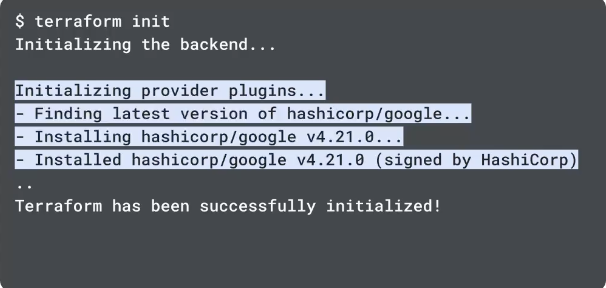

- The `terraform init` command will **automatically download and install any provider binary** for the providers to use within the configuration

- After you run the command, a **hidden directory** called `.terraform` is created **inside the current working directory**

- You will see and initialise provider plugins message, with the provider version that will be installed

**Preview resource action using `terraform plan`**

- `terraform plan` creates an **execution plan** detailing all the **resources** to create/modify/destroy upon executing `terraform apply`

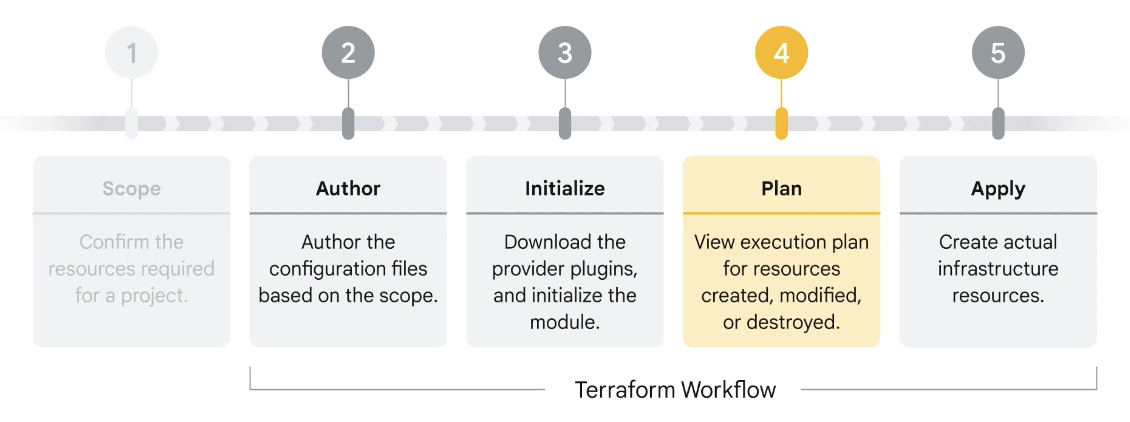

- When `terraform plan` is run, Terraform **reads the current state of existing remote objects** to ensure that terraform state is up-to-, **compares the current configuration to the prior state** and notes any differences and **builds an execution plan** that **only modifies what is necessary** and reach your desired state

- `terraform plan` **doesn't create or change** any infrastructure resources but instead provides you with an opportunity to **preview the infrastructure changes before applying them**. You can run this command before committing a change to version control to be sure that it will behave as expected

```
resource "google_storage_bucket" "example-bucket"{
  name     = "student0313ab04569a94"
  location = "US"
}
```

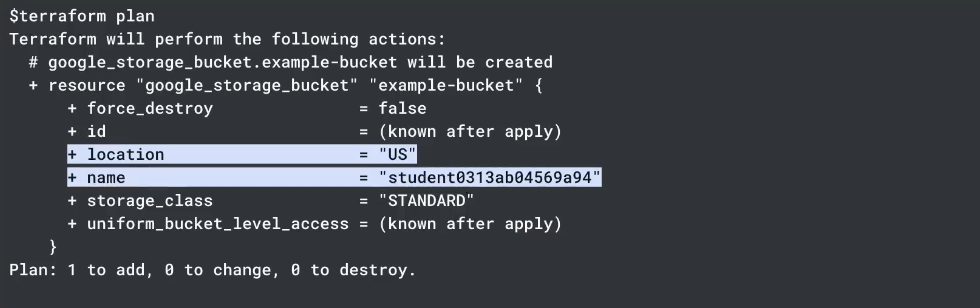

- Optionally, you can **save the generated plan to a file** on disk that will be later executed by passing the file to `terraform apply` as an extra argument

**Executes the actions proposed in a Terraform plan using `terraform apply`**

- `terraform apply` **executes the actions** proposed in a `terraform plan`, **creates the resources** and **establishes the dependencies**

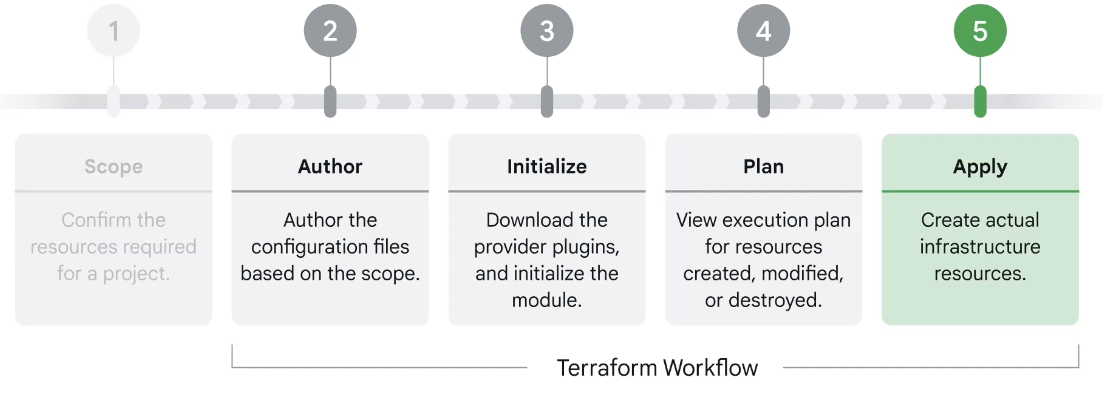

The symbols next to the resources and arguments indicate the actions performed on the resource:

**(+) symbol** next to the resource mans that **Terraform will create the resource**. Terraform also show the attributes that will be set

**(-/+) symbol** means that Terraform will **destroy and create the infrastructure** rather than updating it in place

**(~) symbol** means that Terraform will **update the resource** in place

**(-) symbol** indicates that the instance/network will be **destroyed**

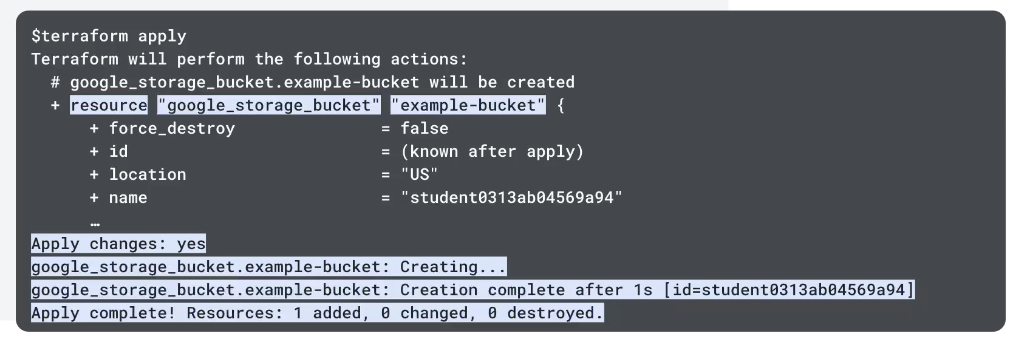

- After running `terraform apply`, Terraform shows its execution plan and waits for approval before making any changes. If the plan is created successfully, **Terraform pauses and waits for approval** before proceeding

- If anything in the plan is incorrect, you can **abort the plan** without changing the infrastructure

- If `terraform apply` **fails**, you can try and **read the error massage** and **troubleshoot** the issue

- Terraform **determines the order** in which **resources** must be **destroyed**.
  - for example, Google Cloud won't alow a VPC to be deleted if it still contains resources. Terraform waits until all instances are destroyed before destroying the network

**Code conventions**

Formatting best practices:

- **Separate meta arguments** from the other arguments by placing them **first** or **last** in the code with a blank line

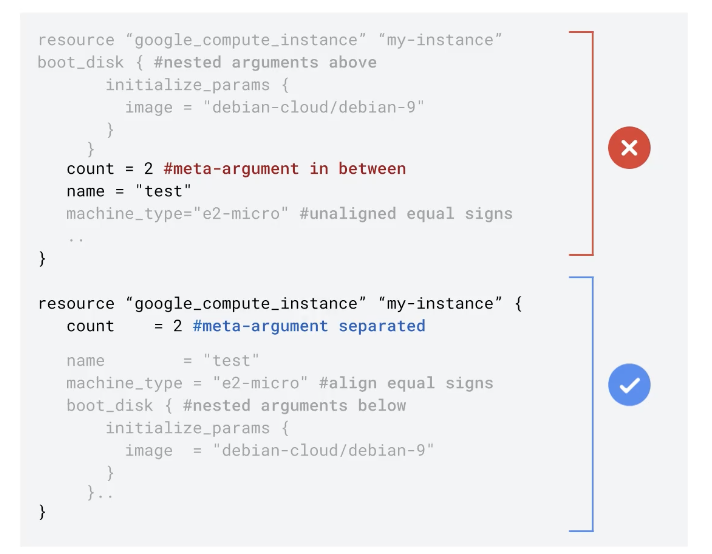

- Use **two spaces** from the block definition to **indent** your arguments

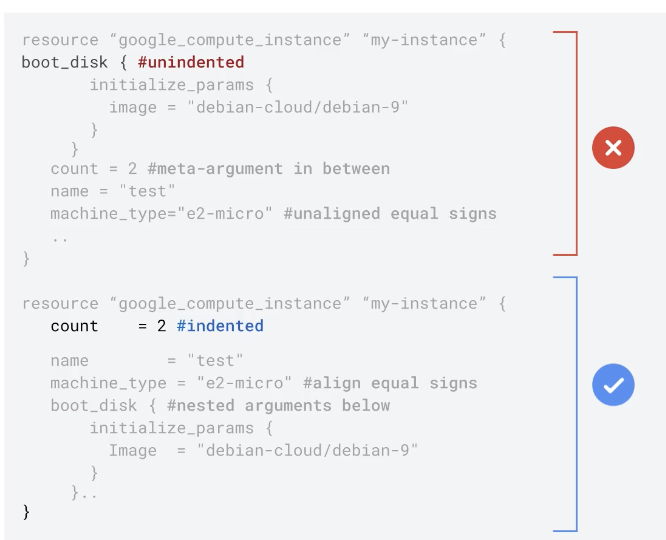

- **Align values** at the **equal sign**

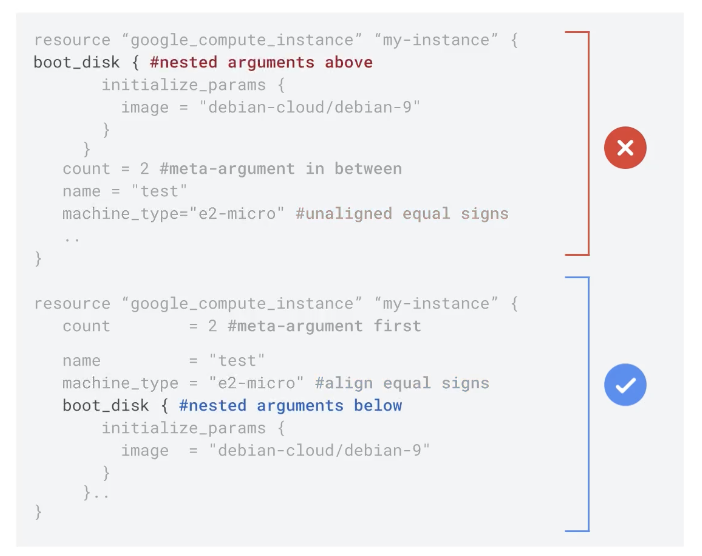

- Place **nested blocks below arguments**:



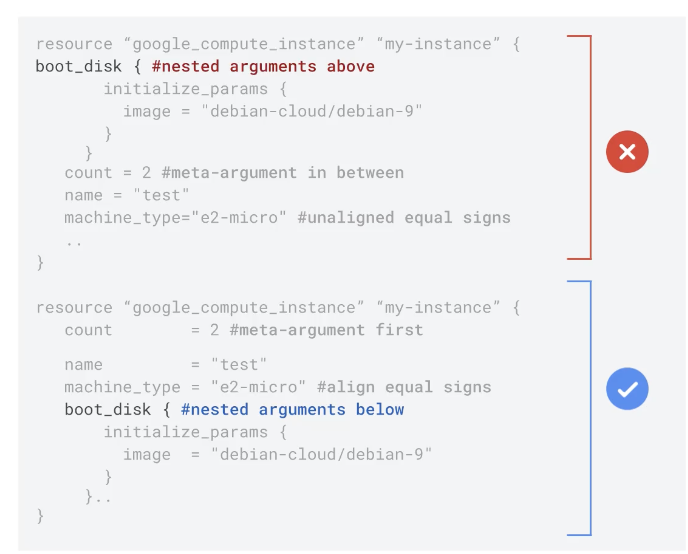


- **Separate blocks** by one **blank line**:

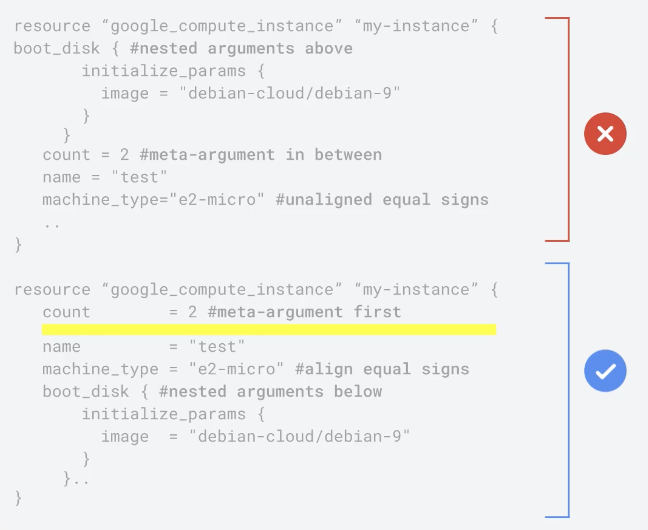

**`terraform fmt`**

- `terraform fmt` can **enforce code convention best practices** and automatically **maintain consistent formatting**

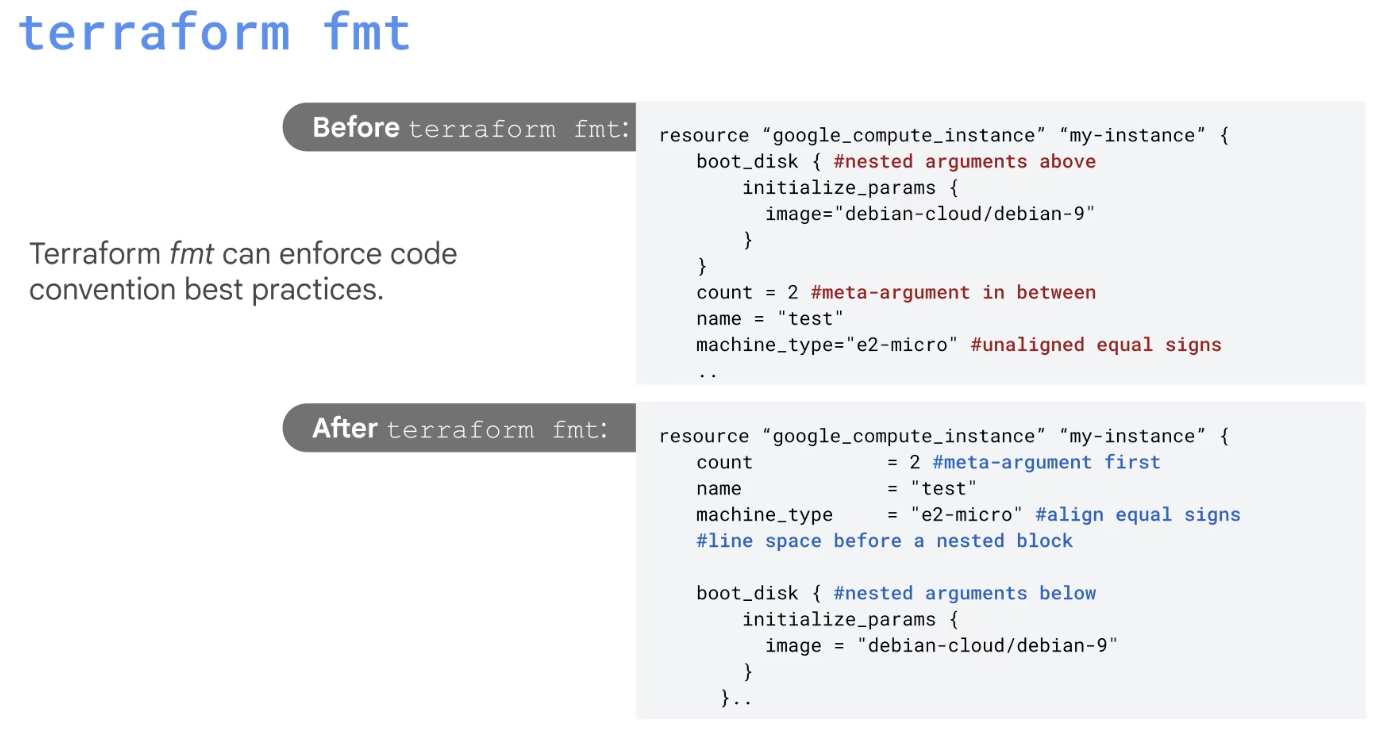

**`terraform destroy` command**

- This command **destroys resources**
- This command is similar to `terraform apply`, however it behaves as all resources have been removed from the configuration
- This command can be used to conveniently clean temporary objects
- You can also **destroy specific resources** by specifying the target resources to destroy

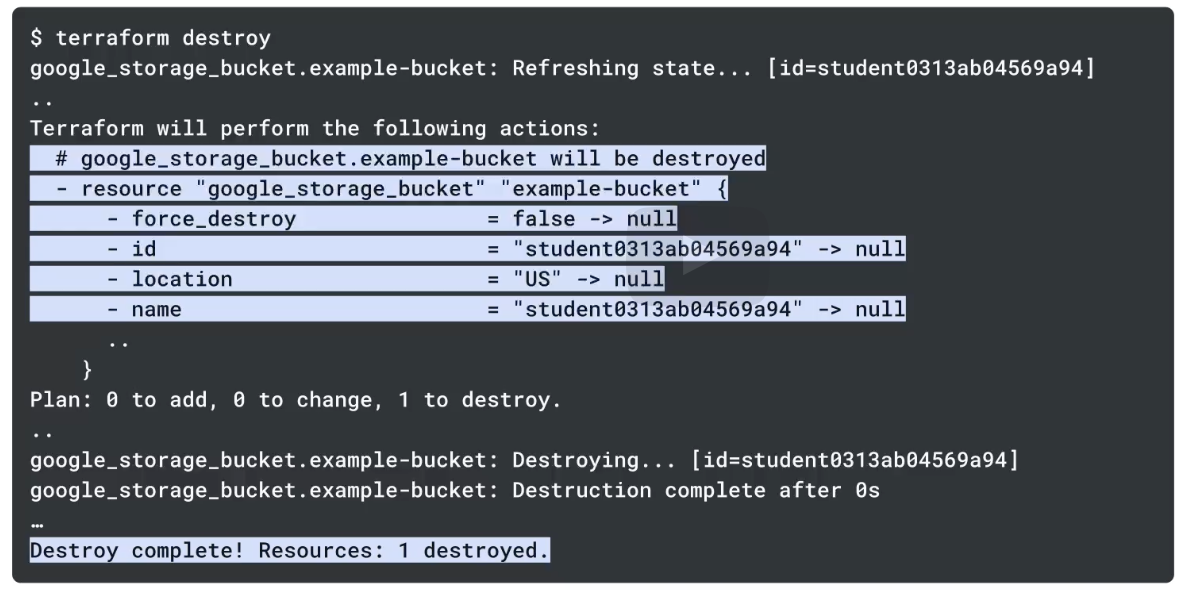

- Destroying the infrastructure is a rare event in the Production environment
- Use `terraform destroy` carefully: this command will **destroy all the resources and its associated data** from the main directory

## **2.4: The Terraform Validator**

**The Validate phase**

- This is an **optional phase** between the **Plan** and **Apply** phases
- During the **Validate phase**, **pre-deployment checks** are run against **organisation policies**, as a part of an infrastructure CI/CD pipeline
- It is also extremely useful as a help to **mitigate configuration errors** that can cause **security** and **governance violations**

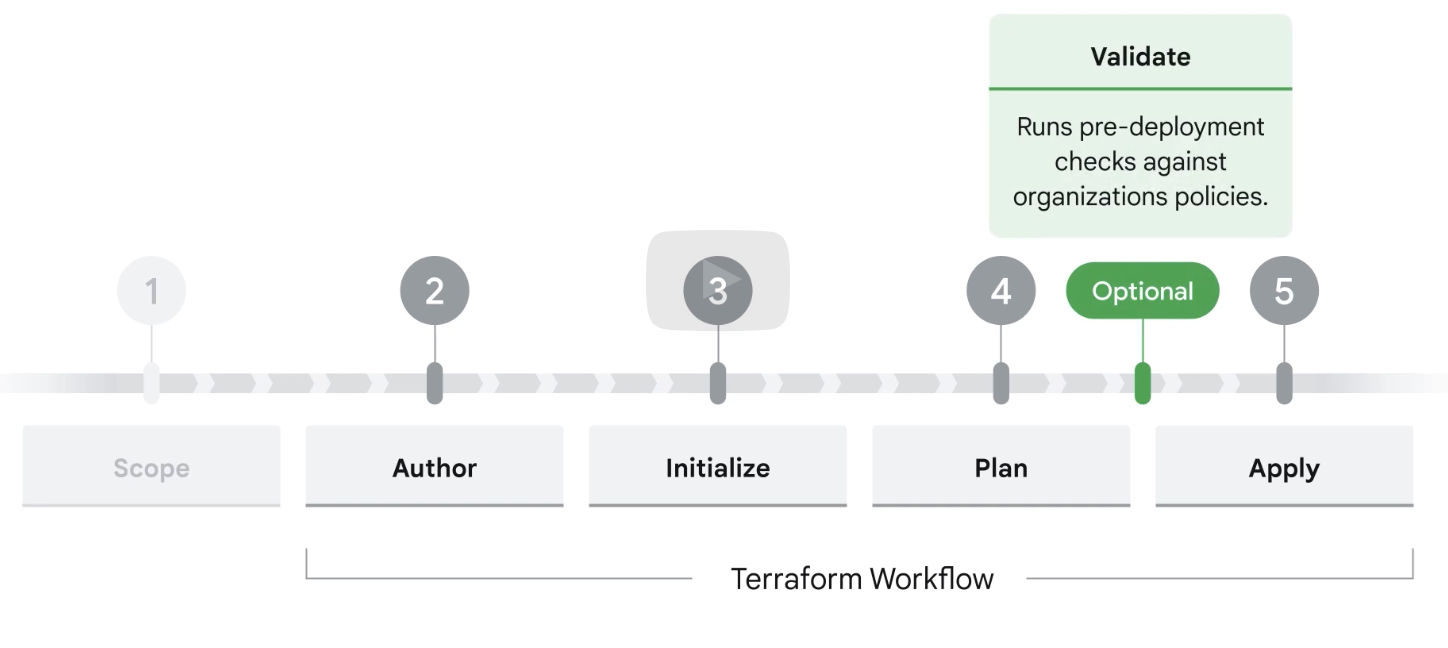

**Why use the Terraform validator tool?**

Businesses are shifting towards IaC, and with that change comes the risk that configuration errors can cause security an governance violations.

Furthermore, any organisation has **compliance and governance policies** in place that must be adhered to.

To address these policies, the **security** and **governance teams** can set up **guardrails** as **constraints**. These constraints must be **compatible** with t**ools across every stage of the application life cycle** (from development to deployment to auditing).

The Terraform validator is run by executing:

```
gcloud beta terraform vet
```

This command **enforces policy compliance** as part of an **infrastructure CI/CD pipeline**.

The tool retrieves project data so you can accurately validate your plan



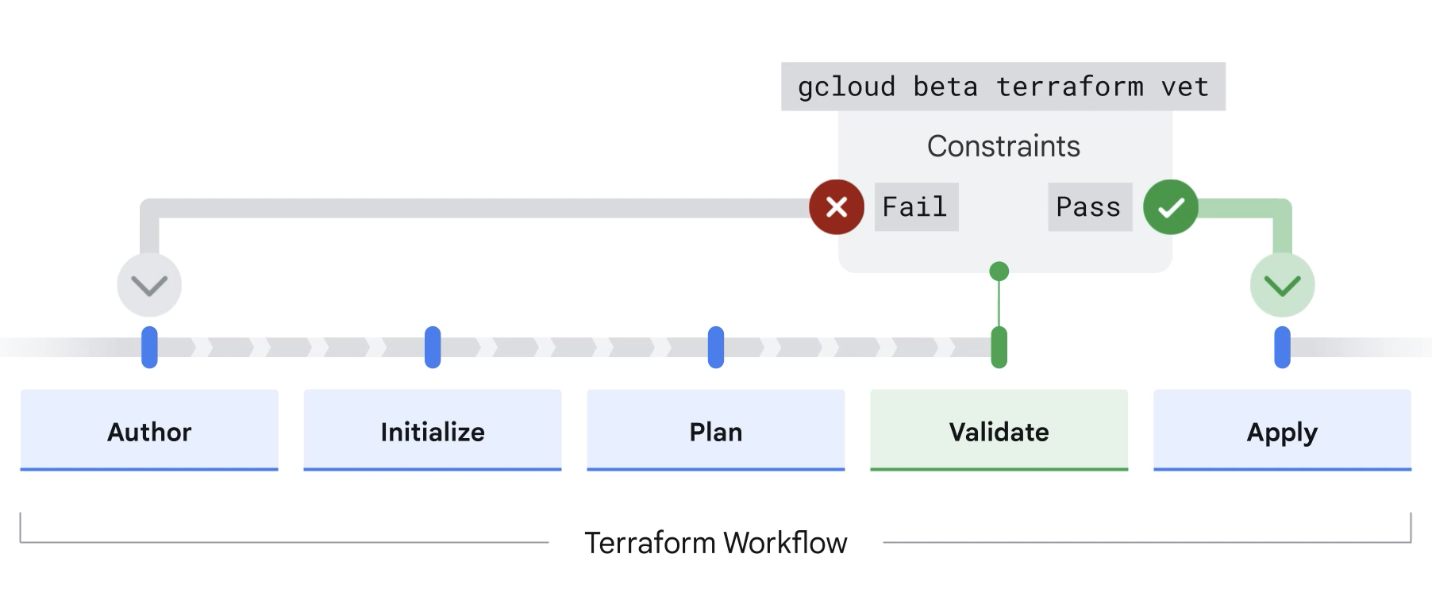

This command is different from the `terraform validate` command, which instead is used for **testing syntax** and the **structure of your configuration** without deploying any resources.

**Terraform Validator Benefits**

- **Enforce policies**: enforce policies at any stage of application development
- **Remove manual errors:** by automating policy validaiton
- **Reduce time to learn**: reduce learning time by using a **single paradigm** for all policy management

**Terraform Validator uses**

1. Platform teams can add **guardrails** to **infrastructure CI/CD pipelines** to ensure **all changes are validated** before deployment to the cloud. This limits platform team involvement by providing **failure messages** to the end users during the **pre-deployment checks**. These messages tell you **which policy is being violated.**

2. Application teams and developers can **validate Terraform configuration** with **organisation's central policy library** to identify misconfigurations early in the development process.Before submitting to a CI/CD pipeline, you can ensure that your Terraform configurations are in compliance with your organisation's policies.

3. **Security teams** can create a **centralised policy library** to identify and prevent policy violations



